## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## **Import Time-Series Data**

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv", header=0, parse_dates=[0], index_col=0).squeeze('columns')

In [ ]:
data.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

## **Plot Time-Series Data**

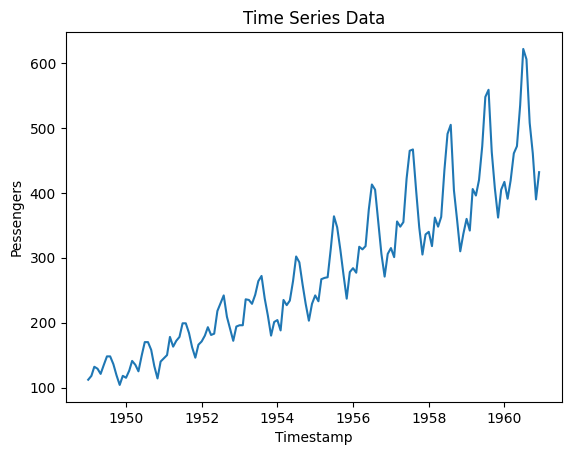

In [ ]:
plt.plot(data)

# set plot title and axis labels
plt.title('Time Series Data')
plt.xlabel('Timestamp')
plt.ylabel('Pessengers')

# display plot
plt.show()

## **Augmented Dickey-Fuller (ADF) test**

In [ ]:
# perform ADF test
result = adfuller(data)

In [ ]:
# print test results
print('ADF Statistic: {:.2f}'.format(result[0]))
print('p-value: {:.2f}'.format(result[1]))
print('Critical Values: ')
for key, value in result[4].items():
    print('\t{}: {:.2f}'.format(key, value))

ADF Statistic: 0.82
p-value: 0.99
Critical Values: 
	1%: -3.48
	5%: -2.88
	10%: -2.58


Since p-value in above ADF test is greater than 0.05, which means data is not stationary. Thus performing differencing to make it stationary.

## **Performing Differencing**

In [ ]:
# Perform differencing on the time series data
df_diff = data.diff().dropna()

# Perform the ADF test on the differenced time series data
result = adfuller(df_diff)

# Print the ADF test results
print("ADF Statistic: {:.2f}".format(result[0]))
print("p-value: {:.2f}".format(result[1]))
print("Critical Values:")
for key, value in result[4].items():
    print("\t{}: {:.3f}".format(key, value))

ADF Statistic: -2.83
p-value: 0.05
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


## **Data Normalization**

For reducing error

In [ ]:
# Normalize the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))
data = pd.DataFrame(data_scaled, columns=['Passengers'], index=data.index)


## **Autocorrelation Function Plot**

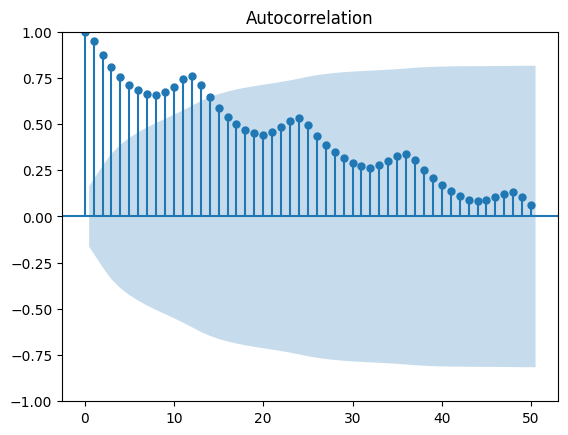

In [ ]:
# create ACF plot
plot_acf(data, lags=50)
plt.show()

## **Partial Autocorrelation Function Plot**

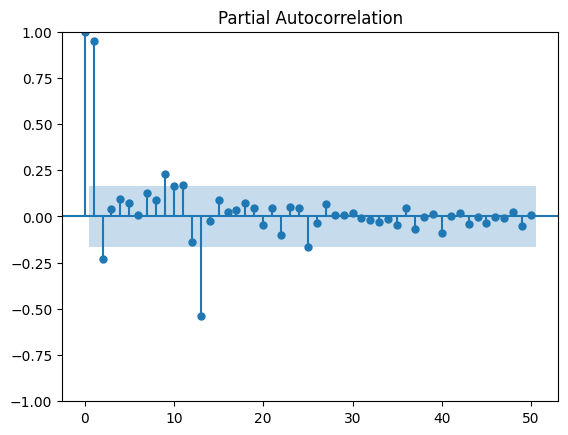

In [ ]:
# create PACF plot
plot_pacf(data, lags=50,method='ywm')
plt.show()

## **ARIMA Model**

### **Train-Test Split**

In [ ]:
# split data into training and testing sets
train_data = data.iloc[:-12]
test_data = data.iloc[-12:]

In [ ]:
# fit ARIMA model to training data
model = ARIMA(train_data, order=(12,1,0))
model_fit = model.fit()

### **Predictions**

In [ ]:
# Make predictions for next 12 months
forecast = model_fit.forecast(steps=12)


### **Plotting Predictions**

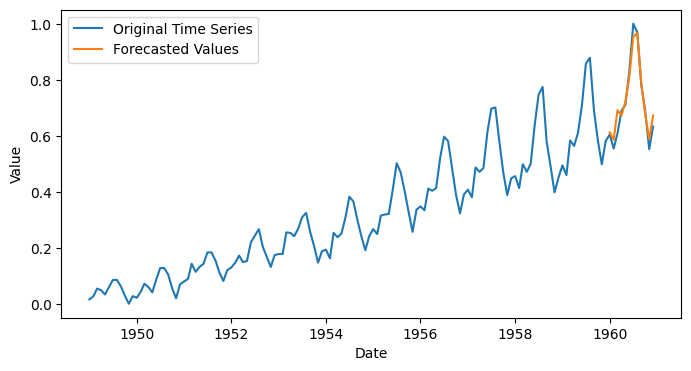

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(data.index, data, label='Original Time Series')
ax.plot(forecast.index, forecast, label='Forecasted Values')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
plt.show()

## **Calculate Error (RMSE)**

In [ ]:
# calculate RMSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')

RMSE: 0.03


## **Actual vs Predicted Values Plot**

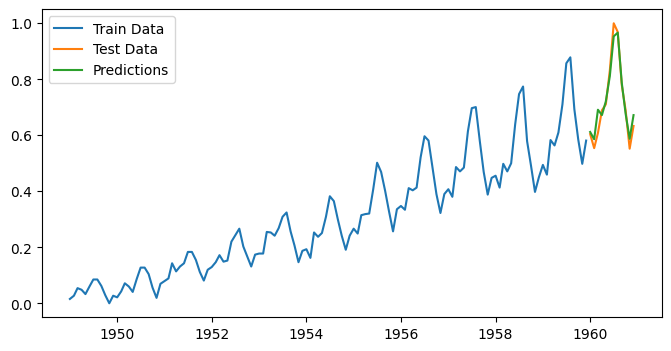

In [ ]:
# plot actual and predicted values
fig = plt.subplots(figsize=(8, 4))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Predictions')
plt.legend()
plt.show()